In [ ]:
%load_ext jupyter_black

# Selección automática de características

El rendimiento del modelo de aprendizaje automático es directamente proporcional \
a las características de los datos, su rendimiento se verá afectado negativamente, \
si las características que se le proporcionan son irrelevantes y por otro lado, el uso de \
características de datos relevantes puede aumente su precisión.


La selección de características puede realizarse de manera automática con las \
siguentes ventajas:
- Realizar la selección de características antes del modelado, reducirá el sobreajuste.
- Realizar la selección de características antes del modelado, aumentará la precisión \
del aprendizaje automático modelo.
- Realizar la selección de características antes del modelado, reducirá el tiempo de \
entrenamiento

## Técnicas de selección automática de características:


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# mostrar información del DataFrame
def info(df):
    display(df.head(10))
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    print("Duplicated: ", df.duplicated().sum())
    print()
    print("Null values %:")
    print(100 * df.isnull().sum() / len(df))

In [4]:
# dataset
# https://www.kaggle.com/code/komalkhetlani/deep-analysis-of-travel-insurance-data

df = pd.read_csv("./datasets/train_house_price.csv")
info(df)

,last_price,total_area,bedrooms,ceiling_height,floors_total,living_area,floor,bike_parking,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest
0,108000.0,59.0,2,2.87,4,31.5,2,0,0,0,6.6,0,20485,8180
1,264000.0,109.0,4,3.15,5,72.0,2,0,0,0,12.2,0,42683,8643
2,140000.0,74.5,3,2.58,10,49.0,9,0,0,0,10.8,0,14078,16670
3,64000.0,37.4,1,2.50,9,20.0,4,0,0,0,6.2,2,17792,17699
4,133000.0,64.9,3,2.65,12,41.9,11,0,0,0,10.4,0,14767,10573
5,94000.0,63.2,3,2.60,9,44.0,2,0,0,0,7.2,1,20271,19273
6,175000.0,65.0,2,2.65,17,32.0,3,0,0,0,11.0,1,35452,15458
7,152000.0,72.0,3,2.50,10,42.0,5,0,0,0,8.0,1,10402,14768
8,63800.0,33.8,1,2.50,9,19.0,8,0,0,0,7.1,0,45657,16608
9,110000.0,51.2,2,2.90,4,31.5,2,0,0,0,7.8,0,14963,10770



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   last_price           6495 non-null   float64
 1   total_area           6495 non-null   float64
 2   bedrooms             6495 non-null   int64  
 3   ceiling_height       6495 non-null   float64
 4   floors_total         6495 non-null   int64  
 5   living_area          6495 non-null   float64
 6   floor                6495 non-null   int64  
 7   bike_parking         6495 non-null   int64  
 8   studio               6495 non-null   int64  
 9   open_plan            6495 non-null   int64  
 10  kitchen_area         6495 non-null   float64
 11  balcony              6495 non-null   int64  
 12  airports_nearest     6495 non-null   int64  
 13  cityCenters_nearest  6495 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 710.5 KB
None

         last_price   total_area  

In [5]:
# Separar las características y la variable objetivo
X = df.drop("last_price", axis=1)
y = df["last_price"]

### 1. Selección univariada

La seleccionar de características se lleva a cabo con la ayuda de pruebas estadísticas, \
que tienen la relación más fuerte con las variables de predicción.



In [6]:
# Aplicar SelectKBest para seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_regression, k=4)
# selector = SclecrKBest(score_func=chi2, k=4) # chi2 para clasificación
selector.fit(X, y)

# Obtener los scores y p-values
scores = selector.scores_
pvalues = selector.pvalues_
columns = X.columns

# Crear un DataFrame con las características seleccionadas y sus scores y p-values
selected_features = columns[selector.get_support()]
features_df = pd.DataFrame(
    {
        "Feature": selected_features,
        "Score": scores[selector.get_support()],
        "P-Value": pvalues[selector.get_support()],
    }
)

# Ordenar las características por score
features_df = features_df.sort_values(by="Score", ascending=False)

# Mostrar el DataFrame con las características seleccionadas
print(features_df)

# Transformar el conjunto de datos para incluir solo las características seleccionadas
X_new = selector.transform(X)
print(X_new)

        Feature        Score        P-Value
0    total_area  5932.834196   0.000000e+00
2   living_area  3400.106470   0.000000e+00
3  kitchen_area  2841.292077   0.000000e+00
1      bedrooms  1246.274450  6.769273e-250
[[ 59.    2.   31.5   6.6]
 [109.    4.   72.   12.2]
 [ 74.5   3.   49.   10.8]
 ...
 [ 62.1   2.   31.   13.9]
 [ 66.    3.   42.2  10.5]
 [ 48.    1.   20.   13. ]]


### 2. Eliminación de funciones recursivas

Como sugiere el nombre, técnica de selección de características RFE (eliminación \
de características recursivas) elimina los atributos de forma recursiva y construye \
el modelo con los atributos restantes. 


In [7]:
# Aplicar Recursive Feature Elimination (RFE)
# para seleccionar las 4 mejores características

selector = RFE(estimator=LinearRegression(), n_features_to_select=4)
# clasificacion:
# selector = RFE(estimator=LogisticRegression(), n_features_to_select=4)
selector.fit(X, y)

# Obtener las características seleccionadas
selected_features = columns[selector.support_]
print(selected_features)

# Transformar el conjunto de datos para incluir solo las características seleccionadas
X_new = selector.transform(X)
print(X_new)

Index(['total_area', 'bedrooms', 'living_area', 'balcony'], dtype='object')
[[ 59.    2.   31.5   0. ]
 [109.    4.   72.    0. ]
 [ 74.5   3.   49.    0. ]
 ...
 [ 62.1   2.   31.    2. ]
 [ 66.    3.   42.2   0. ]
 [ 48.    1.   20.    2. ]]


### 3. Análisis de componentes principales  (PCA)

PCA, generalmente llamada técnica de reducción de datos, es una técnica de selección de características muy útil, ya que utiliza álgebra lineal para transformar el conjunto de datos en una forma comprimida.

Los componentes principales son combinaciones lineales de las variables originales que capturan la mayor parte de la varianza en los datos.

Cada componente principal es ortogonal (no correlacionado) con los demás componentes principales.

Para determinar el número óptimo de componentes principales (PCA), puedes utilizar la varianza explicada acumulada. La idea es seleccionar el número de componentes que expliquen un porcentaje significativo de la varianza total (por ejemplo, 95%).

* Varianza Explicada por Componente:
- Cada componente principal en PCA captura una cierta cantidad de la varianza total en los datos. La varianza explicada por cada componente se expresa como un porcentaje de la varianza total.
* Varianza Explicada Acumulada:
- La varianza explicada acumulada es la suma acumulativa de la varianza explicada por cada componente principal. Se utiliza para determinar cuántos componentes son necesarios para capturar un porcentaje significativo de la varianza total (por ejemplo, 95%).

Por ejemplo, si tienes un conjunto de datos con 4 componentes principales y las varianzas explicadas por cada componente son 40%, 30%, 20%, y 10%, la varianza explicada acumulada sería:

- Componente 1: 40%
- Componente 1 + 2: 40% + 30% = 70%
- Componente 1 + 2 + 3: 40% + 30% + 20% = 90%
- Componente 1 + 2 + 3 + 4: 40% + 30% + 20% + 10% = 100%




Número óptimo de componentes: 8


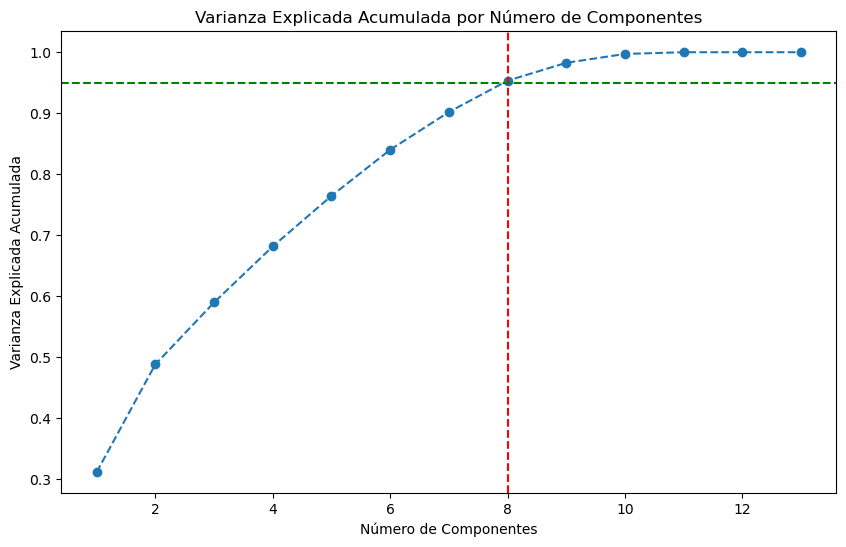

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.133026 -1.905918  0.197290 -0.324488 -0.089862  0.024012 -0.004314   
1     2.502322 -0.607590 -0.491393  1.303142  0.867458  0.275293 -0.438758   
2     0.311479  0.219747 -0.401460 -0.594112 -0.816324 -1.002074 -1.142417   
3    -1.843419 -0.329658 -0.051844 -0.014165 -1.543939  0.708803 -0.023796   
4     0.320981  0.257842  0.015148 -1.105803 -0.435816 -0.884518 -0.589408   
...        ...       ...       ...       ...       ...       ...       ...   
6490 -1.383510 -0.137643  0.112677 -0.124489 -0.144174  0.176255  0.349381   
6491  4.179932  0.284370 -0.451033  0.148156 -0.944657  0.329769 -0.511296   
6492 -0.774916  1.640689 -0.032579  0.334982 -0.209846  0.653224  0.347688   
6493  0.413634 -0.332373 -0.216712 -0.897209 -0.707060 -0.867818 -0.454244   
6494 -1.328074  0.727117  0.177827  0.278367 -0.181380  0.864307  0.818199   

           PC8  
0    -0.203905  
1    -0.246843  
2     0.3452

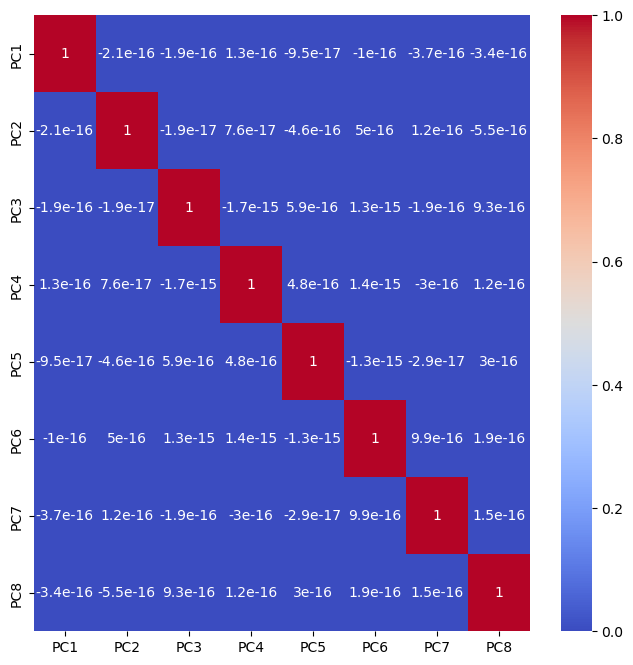

<Figure size 1000x1000 with 0 Axes>

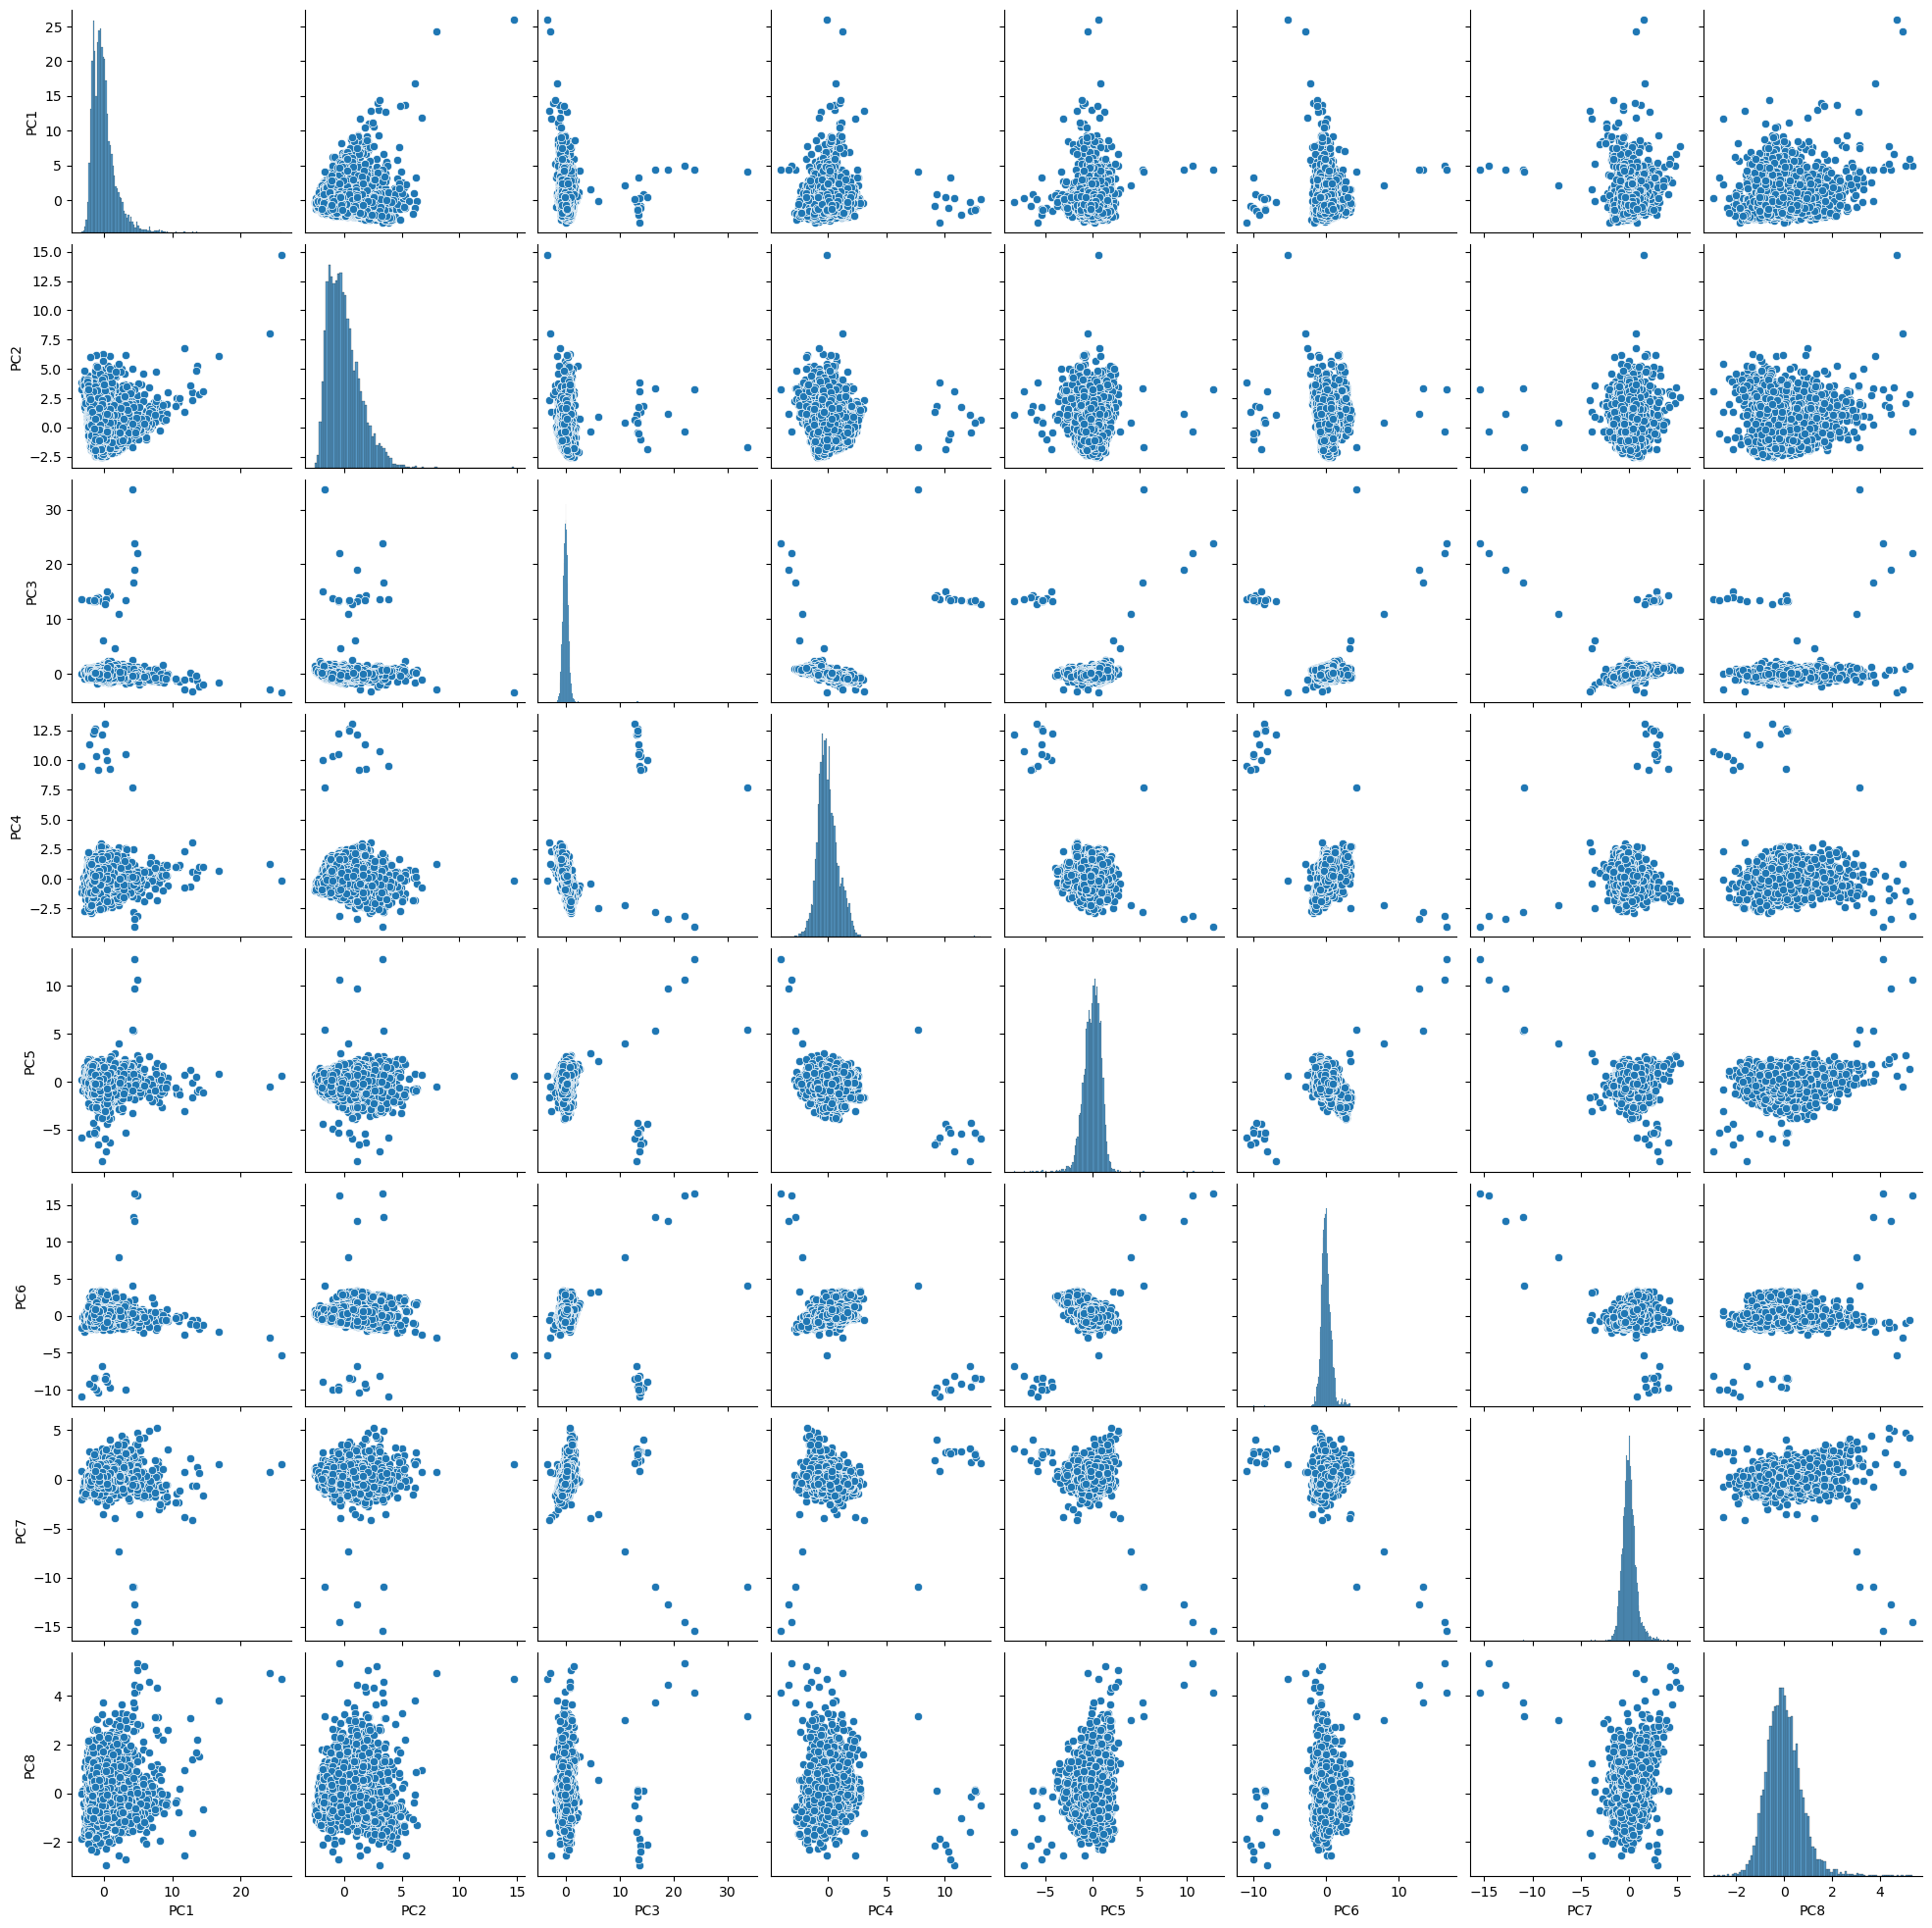

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determinar el número óptimo de componentes que expliquen al 
# menos el 95% de la varianza
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1

print(f"Número óptimo de componentes: {optimal_components}")

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker="o",
    linestyle="--",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Varianza Explicada Acumulada por Número de Componentes")
plt.axvline(optimal_components, color="r", linestyle="--")
plt.axhline(0.95, color="g", linestyle="--")
plt.show()

# Aplicar PCA con el número óptimo de componentes
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Crear un DataFrame con las características transformadas
pca_df = pd.DataFrame(
    data=X_pca_optimal, columns=[f"PC{i+1}" for i in range(optimal_components)]
)

# Mostrar el DataFrame con las características transformadas
print(pca_df)

# Mostrar la varianza explicada por cada componente
print(pca_optimal.explained_variance_ratio_)
print(pca_optimal.explained_variance_ratio_.sum())

# Mostrar la matriz de correlación
plt.figure(figsize=(8, 8))
sns.heatmap(pca_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Mostrar la distribución de las características transformadas
plt.figure(figsize=(10, 10))
sns.pairplot(pca_df)
plt.show()


## 4.  Importancia de la característica

Utiliza un clasificador supervisado capacitado para seleccionar características. 

En un modelo de árbol de decisión (o en un conjunto de árboles como en un bosque \
aleatorio) proporciona una medida de la importancia de cada característica en la \
predicción del modelo. 

Esta importancia se calcula en función de :

1. Reducción de la impureza: Cada vez que una característica se utiliza para dividir \
un nodo en el árbol, contribuye a la reducción de la impureza del nodo (por ejemplo, \
reducción del índice de Gini o de la entropía).
2. Promedio ponderado: La importancia de una característica es la suma de las reducciones de impureza que proporciona en todos los nodos, ponderada por el número de muestras que pasan por esos nodos.


                Feature  Importance
0            total_area    0.443966
9          kitchen_area    0.140913
4           living_area    0.085239
12  cityCenters_nearest    0.079143
11     airports_nearest    0.061465
1              bedrooms    0.058217
3          floors_total    0.046350
2        ceiling_height    0.043274
5                 floor    0.034085
10              balcony    0.007112
6          bike_parking    0.000235
7                studio    0.000000
8             open_plan    0.000000


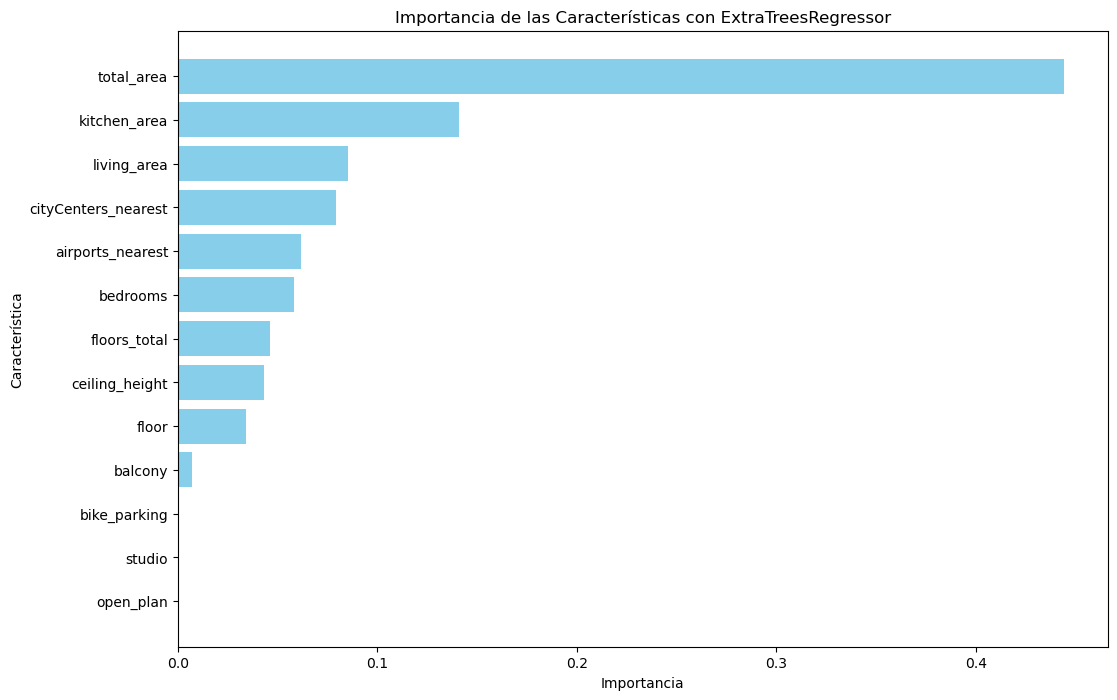

Número óptimo de características: 11


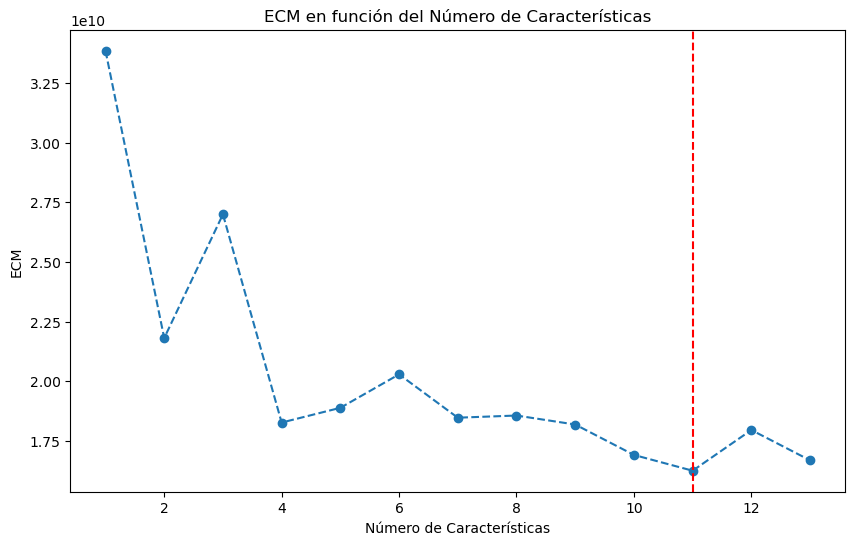

In [25]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar el modelo ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Obtener las importancias de las características
importances = model.feature_importances_

# Crear un DataFrame con las características y sus importancias
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})

# Ordenar las características por importancia
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Mostrar las características más importantes
print(feature_importances)

# Graficar las importancias de las características
plt.figure(figsize=(12, 8))
plt.barh(
    feature_importances["Feature"], feature_importances["Importance"], color="skyblue"
)
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de las Características con ExtraTreesRegressor")
plt.gca().invert_yaxis()
plt.show()

# Evaluar el modelo utilizando diferentes números de características
results = []
for i in range(1, len(feature_importances) + 1):
    selected_features = feature_importances["Feature"][:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    results.append((i, mse))

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results, columns=["Number of Features", "MSE"])

# Encontrar el número óptimo de características
optimal_features = results_df.loc[results_df["MSE"].idxmin(), "Number of Features"]
print(f"Número óptimo de características: {optimal_features}")

# Graficar el ECM en función del número de características
plt.figure(figsize=(10, 6))
plt.plot(
    results_df["Number of Features"], results_df["MSE"], marker="o", linestyle="--"
)
plt.xlabel("Número de Características")
plt.ylabel("ECM")
plt.title("ECM en función del Número de Características")
plt.axvline(optimal_features, color="r", linestyle="--")
plt.show()